In [79]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline

# 1. Read Data

In [2]:
path = "~/Desktop/kaggle/Porto/"

In [3]:
df = pd.read_csv(path+'train.csv',index_col='id')#,nrows=50000)

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


# 2. Get Features and Target

## 2.1 Categorical

In [24]:
cats = pd.DataFrame()
for col in df.columns:
    if 'cat' in col:
        cats = pd.concat([cats,pd.get_dummies(df[col],prefix=col)],axis=1)

In [26]:
cats.head()

,ps_ind_02_cat_-1,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_-1,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_-1,ps_ind_05_cat_0,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## 2.2 Binary

In [38]:
cols = []
for col in df.columns:
    if 'bin' in col:
        cols.append(col)
        
bins = df[cols]

In [39]:
bins.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


## 2.3 Features

In [40]:
df = df[['target']]
df = pd.concat([bins,cats,df],axis=1)

In [41]:
df.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
features = list(df.columns)
target = 'target'
features.remove(target)

In [87]:
# X = np.array(df[features])
# y = df[target]

In [94]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42)

In [96]:
train.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,...,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104,target
80326,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
234939,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
447914,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
108058,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
89435,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Build Model

## 4.1 Training

In [98]:
from keras import regularizers
model = Sequential()
model.add(Dense(20, input_dim=201, activation='relu',
                activity_regularizer=regularizers.l1(10e-5)))
model.add(Dense(201, activation='sigmoid'))

In [101]:
from keras import optimizers

optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='binary_crossentropy', optimizer='adadelta')

X_train = np.array(train[train.target==0][features])

model.fit(X_train, 
          X_train, 
          epochs=20, 
          batch_size=1000, 
          #validation_split=0.2, 
          verbose=1)

Epoch 1/20
384300/384300 [==============================] - 13s - loss: 0.6733     

## 4.2 Test

In [102]:
X_test = np.array(test[test.target==0][features])
X_test1 = np.array(test[test.target==1][features])

### Residual for class 0

In [103]:
X_test_pred = model.predict(X_test)

In [105]:
Red = pd.DataFrame(X_test_pred-X_test)

In [106]:
Red.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.603313,0.254269,0.164499,0.187205,0.03471,0.035376,0.039144,0.034913,0.663117,-0.876819,...,0.037705,0.036454,0.035785,0.036971,0.045802,0.038223,0.040942,0.03628,0.058907,0.144007
1,0.396687,0.254269,0.164499,-0.812795,0.03471,0.035376,0.039144,0.034913,-0.336883,0.123181,...,0.037705,0.036454,0.035785,0.036971,0.045802,0.038223,0.040942,0.03628,0.058907,-0.855993
2,0.396687,0.254269,-0.835501,0.187205,0.03471,0.035376,0.039144,0.034913,0.663117,0.123181,...,0.037705,0.036454,0.035785,0.036971,0.045802,0.038223,0.040942,0.03628,0.058907,0.144007
3,0.396687,-0.745731,0.164499,0.187205,0.03471,0.035376,0.039144,0.034913,0.663117,0.123181,...,0.037705,0.036454,-0.964215,0.036971,0.045802,0.038223,0.040942,0.03628,0.058907,0.144007
4,-0.603313,0.254269,0.164499,0.187205,0.03471,0.035376,0.039144,0.034913,0.663117,-0.876819,...,0.037705,0.036454,0.035785,0.036971,0.045802,0.038223,0.040942,0.03628,0.058907,0.144007


In [107]:
Red = Red.applymap(abs).apply(sum,axis=1)

### Residual for class 1

In [108]:
X_test1_pred = model.predict(X_test1)

In [109]:
Red1 = pd.DataFrame(X_test1_pred-X_test1)

In [110]:
Red1 = Red1.applymap(abs).apply(sum,axis=1)

### Distribution of residuals

(array([ 0.31309756,  0.87524999,  0.96775609,  1.60818291,  2.284189  ,
         3.05981705,  3.73582314,  4.0631524 ,  4.58972557,  4.88147557,
         3.98487801,  4.39759752,  3.57927436,  3.01000607,  2.63998168,
         1.7789634 ,  1.3804756 ,  1.23104267,  0.84678658,  0.55503658,
         0.47676219,  0.37002439,  0.26328658,  0.18501219,  0.04981098,
         0.05692683,  0.02846341,  0.01423171,  0.01423171,  0.00711585]),
 array([ 2.96472365,  2.98423647,  3.00374928,  3.02326209,  3.0427749 ,
         3.06228772,  3.08180053,  3.10131334,  3.12082616,  3.14033897,
         3.15985178,  3.17936459,  3.19887741,  3.21839022,  3.23790303,
         3.25741585,  3.27692866,  3.29644147,  3.31595428,  3.3354671 ,
         3.35497991,  3.37449272,  3.39400554,  3.41351835,  3.43303116,
         3.45254397,  3.47205679,  3.4915696 ,  3.51108241,  3.53059523,
         3.55010804]),
 <a list of 30 Patch objects>)

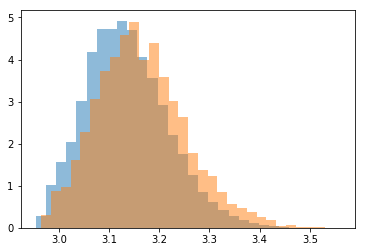

In [111]:
plt.hist(np.log1p(Red),bins=30,normed=True,alpha=0.5)
plt.hist(np.log1p(Red1),bins=30,normed=True,alpha=0.5)